epoch=  1,train_loss=742.5812,valid_loss=533.8671
epoch=  2,train_loss=733.3940,valid_loss=525.8806
epoch=  3,train_loss=724.4096,valid_loss=518.1147
epoch=  4,train_loss=715.6199,valid_loss=510.5598
epoch=  5,train_loss=707.0175,valid_loss=503.2066
epoch=  6,train_loss=698.5954,valid_loss=496.0464
epoch=  7,train_loss=690.3469,valid_loss=489.0710
epoch=  8,train_loss=682.2654,valid_loss=482.2723
epoch=  9,train_loss=674.3451,valid_loss=475.6432
epoch= 10,train_loss=666.5801,valid_loss=469.1766
epoch= 11,train_loss=658.9650,valid_loss=462.8658
epoch= 12,train_loss=651.4946,valid_loss=456.7048
epoch= 13,train_loss=644.1639,valid_loss=450.6872
epoch= 14,train_loss=636.9684,valid_loss=444.8075
epoch= 15,train_loss=629.9034,valid_loss=439.0605
epoch= 16,train_loss=622.9648,valid_loss=433.4411
epoch= 17,train_loss=616.1486,valid_loss=427.9443
epoch= 18,train_loss=609.4509,valid_loss=422.5657
epoch= 19,train_loss=602.8680,valid_loss=417.3010
epoch= 20,train_loss=596.3965,valid_loss=412.1460


epoch=167,train_loss=184.2977,valid_loss=126.6628
epoch=168,train_loss=183.3023,valid_loss=126.1747
epoch=169,train_loss=182.3188,valid_loss=125.6954
epoch=170,train_loss=181.3471,valid_loss=125.2248
epoch=171,train_loss=180.3871,valid_loss=124.7629
epoch=172,train_loss=179.4385,valid_loss=124.3094
epoch=173,train_loss=178.5015,valid_loss=123.8644
epoch=174,train_loss=177.5756,valid_loss=123.4277
epoch=175,train_loss=176.6609,valid_loss=122.9991
epoch=176,train_loss=175.7573,valid_loss=122.5786
epoch=177,train_loss=174.8645,valid_loss=122.1660
epoch=178,train_loss=173.9824,valid_loss=121.7613
epoch=179,train_loss=173.1108,valid_loss=121.3642
epoch=180,train_loss=172.2498,valid_loss=120.9748
epoch=181,train_loss=171.3990,valid_loss=120.5928
epoch=182,train_loss=170.5585,valid_loss=120.2183
epoch=183,train_loss=169.7280,valid_loss=119.8511
epoch=184,train_loss=168.9076,valid_loss=119.4911
epoch=185,train_loss=168.0972,valid_loss=119.1382
epoch=186,train_loss=167.2964,valid_loss=118.7923


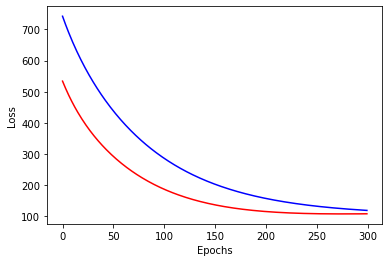

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

# print("Tensorflow版本：",tf.__version__)

df=pd.read_csv("data/boston_house.csv",header=0)
ds=df.values
ds=np.array(ds)
# for i in range(12):
#     ds[:,i]=ds[:,i]/(ds[:,i].max()-ds[:,i].min())
# print(df.describe())
# print(ds.shape)



x_data=ds[:,:12]
y_data=ds[:,12]
# print('x_data shape:',x_data.shape)
# print('y_data shape:',y_data.shape)

# for i in range(12):
#     x_data[:,i]=(x_data[:,i]-x_data[:,i].min())/(x_data[:,i].max()-x_data[:,i].min())

train_num=300
valid_num=100
test_num=len(x_data)-train_num-valid_num
#训练集
x_train=x_data[:train_num]
y_train=y_data[:train_num]
#验证集
x_valid=x_data[train_num:train_num+valid_num]
y_valid=y_data[train_num:train_num+valid_num]
#测试集
x_test=x_data[train_num+valid_num:train_num+valid_num+test_num]
y_test=y_data[train_num+valid_num:train_num+valid_num+test_num]

x_train=tf.cast(scale(x_train),dtype=tf.float32)
x_valid=tf.cast(scale(x_valid),dtype=tf.float32)
x_test=tf.cast(scale(x_test),dtype=tf.float32)

def model(x,w,b):
    return tf.matmul(x,w)+b

W=tf.Variable(tf.random.normal([12,1],mean=0.0,stddev=1.0,dtype=tf.float32))
B=tf.Variable(tf.zeros(1),dtype=tf.float32)
# print(W)
# print(B)

#设置训练参数
training_epochs=300
learning_rate=0.0001
batch_size=10

#定义均方差损失函数
def loss(x,y,w,b):
    err=model(x,w,b)-y
    squared_err=tf.square(err)
    return tf.reduce_mean(squared_err)

#定义梯度计算函数
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_=loss(x,y,w,b)
    return tape.gradient(loss_,[w,b])

#梯度优化器
# optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
optimizer=tf.keras.optimizers.SGD(learning_rate)


#迭代训练
loss_list_train=[]
loss_list_valid=[]
total_step=int(train_num/batch_size)

for epoch in range(training_epochs):
    for step in range(total_step):
        xs=x_train[step*batch_size:(step+1)*batch_size,:]
        ys=y_train[step*batch_size:(step+1)*batch_size]
        grads=grad(xs,ys,W,B)
        optimizer.apply_gradients(zip(grads,[W,B]))
        
    loss_train=loss(x_train,y_train,W,B).numpy()
    loss_valid=loss(x_valid,y_valid,W,B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print("epoch={:3d},train_loss={:.4f},valid_loss={:.4f}".format(epoch+1,loss_train,loss_valid))
        
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")

print("Test_loss:{:.4f}".format(loss(x_test,y_test,W,B).numpy()))
print("W:",W.numpy())
print("B",B.numpy())
